# Storytelling Data Visualization on Exchange Rates

![euro-image](euro.jpg)

# Table of Contents
1. [**Introduction**](#1)
2. [**Loading the Data**](#2)
3. [**Data Cleaning**](#3)
4. [**EUR-USD Exchange Rate Evolution**](#4)
* [The Four Presidencies](#4.1)
* [The 2007-2008 Financial Crisis](#4.2)
5. [**Conclusion**](#5)

<a id="1"></a>
# Introduction
It wasn't until 1999 that the euro really began its journey, when 11 countries fixed their exchange rates and created a new currency with monetary policy passed to the European Central Bank. Today euro is 20+ years old. 

Daria Chemkaeva put together the data set on Euro daily exchange rates between 1999 and 2021, and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) - the data source is the European Central Bank. Note that the dataset gets regular updates. 

**Project Goal:**
Our goal is to create a storytelling data visualization using the data we have. We will narrow down to the following ideas:
* We show comparatively how the euro-dollar rate changed under the last four US presidents(George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). 
* We also show how the euro-dollar rate changed during the 2007-2008 financial crisis. 

<a id="2"></a>
# Loading the Data

In [1]:
import pandas as pd

exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-05-26,1.6439,1.9558,5.3878,1.4630,0.9707,7.5874,NaN,23.648,7.4489,...,4.9572,NaN,11.5280,1.4520,NaN,NaN,37.2630,21.5340,1.0751,21.0148
1,2023-05-25,1.6443,1.9558,5.3320,1.4599,0.9708,7.5891,NaN,23.645,7.4502,...,4.9495,NaN,11.5490,1.4515,NaN,NaN,37.1540,21.3944,1.0735,20.7466
2,2023-05-24,1.6402,1.9558,5.3397,1.4600,0.9732,7.6005,NaN,23.671,7.4477,...,4.9614,NaN,11.5103,1.4526,NaN,NaN,37.1710,21.4487,1.0785,20.7479
3,2023-05-23,1.6282,1.9558,5.3649,1.4571,0.9718,7.6039,NaN,23.681,7.4475,...,4.9720,NaN,11.4494,1.4527,NaN,NaN,37.4350,21.3993,1.0779,20.7920
4,2023-05-22,1.6294,1.9558,5.4056,1.4618,0.9700,7.6067,NaN,23.676,7.4478,...,4.9737,NaN,11.3765,1.4554,NaN,NaN,37.2820,21.4629,1.0822,20.9137


In [2]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
6306,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6307,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6308,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6309,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6310,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6311 non-null   object 
 1   [Australian dollar ]      6311 non-null   object 
 2   [Bulgarian lev ]          5909 non-null   object 
 3   [Brazilian real ]         6043 non-null   object 
 4   [Canadian dollar ]        6311 non-null   object 
 5   [Swiss franc ]            6311 non-null   object 
 6   [Chinese yuan renminbi ]  6043 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6311 non-null   object 
 9   [Danish krone ]           6311 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6311 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6311 non-null   object 
 14  [Croatia

**Insights**   
* The dataset has `5699` rows and `41` columns.  
* We have some of the columns with missing values. In our analysis, we'll be focusing on the columns: `Period/Unit: `, `[US dollar ]` and `[South African rand ] `, which do not have missing values. 
* Most of the columns are of `object` datatype. 


<a id="3"></a>
# Data Cleaning
We need to do a bit of data cleaning before we start creating the data visualizations. 

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               '[South African rand ]': 'ZAR',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,ZAR
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [5]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
          ..
1.0828     1
1.1660     1
1.0595     1
0.9352     1
1.1207     1
Name: US_dollar, Length: 3734, dtype: int64

There are different characters where the character `-` appears. We will drop this character from the `US_dollar` column and convert it from `object` to `float` datatype.

In [6]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6310
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6249 non-null   datetime64[ns]
 1   US_dollar  6249 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.5 KB


Now that we've cleaned the data, we'll focus on visualizing the evolution of the `euro-dollar` exchange rate.
<a id="4"></a>
# EUR-USD Exchage Rate Evolution 
## General trend

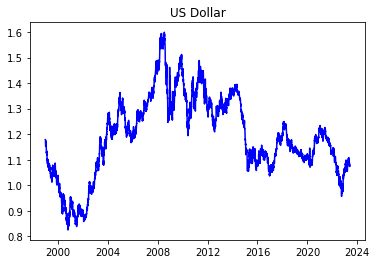

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'], c='b')
plt.title('US Dollar')
plt.show()

If we look at the lines' shape, we see many small wiggles- rather than seeing a smooth line. These wiggles have a meaning, they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward and downward trends in the longer run(months or years).

With our goal in mind, we may not want to show that daily variation on our graph. We can use the **rolling mean**(also known as the moving average) and show only the long-term trends. Let's look at the different graphs with different values for the rolling window. 

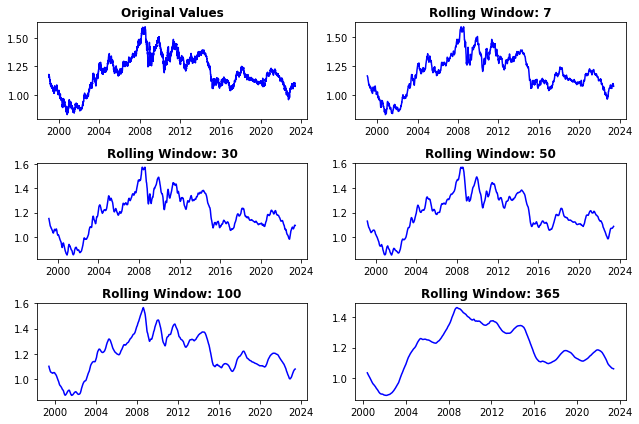

In [8]:
plt.figure(figsize=(9, 6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'], c='b')
plt.title('Original Values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                          [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
            euro_to_dollar['US_dollar'].rolling(rolling_mean).mean(), c='b')
    plt.title(f'Rolling Window: {rolling_mean}', weight='bold')
    
plt.tight_layout()
plt.show()

From the different graphs above, we will use 30 days as our rolling window, since the graph has reduced noise without losing information from the trend of the graph. 

In [9]:
# creating a column with the smoothed values for the rates
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
6306,2023-05-22,1.0822,1.095337
6307,2023-05-23,1.0779,1.094883
6308,2023-05-24,1.0785,1.094483
6309,2023-05-25,1.0735,1.093860


Over the last 22 years, a lot has happened in the USA both at national and international scales that influenced the EUR-USD exchange rate variation.
<a id="4.1"></a>
## The Four US Presidencies
The US ruling party casts a strong influence on the EUR-USD exchange rate, according to this [article](https://www.fxempire.com/news/article/the-effect-of-us-presidents-on-eurusd-movement-393715).

In this section, we will show comparatively how the EUR-USD rate changed under 4 presidents(George W. Bush(2001-2009), Barack Obama(2009-2017), Donald Trump(2017-2021), and Joe Biden(2021-incumbent)).


In [10]:
presidents = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2023)]

# creating a dataframe for each of the 4 presidents
bush = presidents.copy()[presidents['Time'].dt.year < 2009]
obama = presidents.copy()[(presidents['Time'].dt.year >= 2009) &
                         (presidents['Time'].dt.year < 2017)]
trump = presidents.copy()[(presidents['Time'].dt.year >= 2017) &
                         (presidents['Time'].dt.year < 2021)]
biden = presidents.copy()[presidents['Time'].dt.year >= 2021]
   

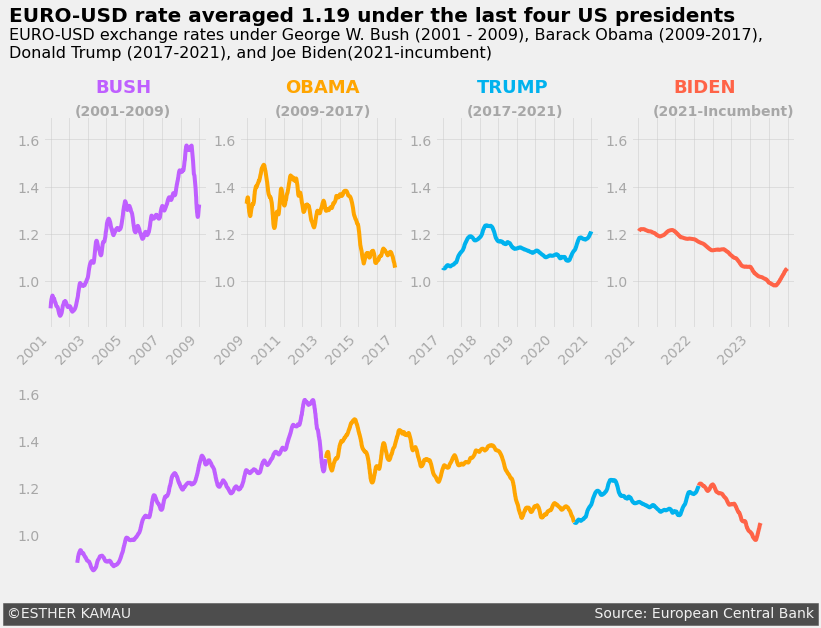

In [11]:
# adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

# adding the subplots
plt.figure(figsize=(12, 8))
ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)
ax5 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4, ax5]

for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'], alpha=0.3)
    ax.xaxis.grid(True, alpha=0.5)
    ax.yaxis.grid(True, alpha=0.5)
# bush
ax1.plot(bush['Time'], bush['rolling_mean'], color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '' ,'2003', '', '2005', '', '2007', '', '2009'],
                  alpha=0.3, rotation = 45, ha="right")
ax1.text(12200, 1.8, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(11800, 1.7, '(2001-2009)', weight='bold',
        alpha=0.3)

# obama
ax2.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3, rotation = 45, ha="right")
ax2.text(15000, 1.8, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(14800, 1.7, '(2009-2017)', weight='bold',
         alpha=0.3)

# trump 
ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3, rotation = 45, ha="right")
ax3.text(17500, 1.8, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(17400, 1.7, '(2017-2021)', weight='bold',
         alpha=0.3)

# biden
ax4.plot(biden['Time'], biden['rolling_mean'],
        color='tomato')
ax4.set_xticklabels(['2021', '',  '', '2022', '', '', '2023', '', ''], alpha=0.3,
                   rotation = 45, ha="right")
ax4.text(18800, 1.8, 'BIDEN', fontsize=18, weight='bold',
        color='tomato')
ax4.text(18700, 1.7, '(2021-Incumbent)', weight='bold',
         alpha=0.3)

# all
ax5.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax5.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax5.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax5.plot(biden['Time'], biden['rolling_mean'],
        color='tomato')
ax5.grid(alpha=0.5)
ax5.set_xticks([])

# title and subtitle
ax1.text(10500, 2.1, 'EURO-USD rate averaged 1.19 under the last four US presidents',
         fontsize=20, weight='bold')
ax1.text(10500, 1.95, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017), 
Donald Trump (2017-2021), and Joe Biden(2021-incumbent)''',
        fontsize=16)

# signature
ax5.text(10500, 0.65, '©ESTHER KAMAU' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)
plt.show()

**Insights**
* **George W Bush**: The USD/EUR exchange rate saw significant fluctuations during President George W. Bush's two terms in office. It started around 0.92 in 2001 and reached its highest levels in the mid-2000s, touching approximately 1.60 in 2008 during the global financial crisis.
* **Barak Obama**: During President Barack Obama's tenure, the USD/EUR exchange rate experienced continued volatility. It started around 1.40 in 2009, but the U.S. dollar strengthened against the euro during his presidency, driven by factors like the eurozone debt crisis. It reached around 1.05 by the end of his second term in 2017.
* **Donald Trump**: Under President Donald Trump, the USD/EUR exchange rate initially experienced some fluctuations. It began around 1.05 in 2017, and there were moments of strength and weakness in the U.S. dollar during his presidency. However, by 2021, the exchange rate had moved back up to around 1.20.
* **Joe Biden**: President Joe Biden took office in January 2021. The performance of the USD/EUR exchange rate during his presidency will depend on various factors such as economic policies, geopolitical developments, and global economic conditions. At the time of the last update on the dataset(May 2023), the exchange rate is around 1.05.

<a id="4.2"></a>
## The 2007-2008 Financial Crisis
The 2007-2008 financial crisis was a severe worldwide economic crisis that began with problems in the U.S. housing market and quickly spread to the global financial system. It was characterized by a collapse of confidence in financial institutions, a freezing of credit markets, and a severe economic downturn. Some of the major events during the crisis derived from this [article](https://www.cfr.org/timeline/us-financial-crisis) were as follows:

* **February 2007**: United States experience the greatest single-year loss in house sales in more than two decades.
* **April 2007**: The largest subprime lender in the United States, New Century Financial Corporation, declares bankruptcy.
* **August 2007**: Subprime mortgage problems spread worldwide as hedge funds and banks around the globe reveal substantial holdings of mortgage-backed securities
* **September 2007**: The Federal Reserve makes its first in a series of interest rate cuts, lowering the benchmark federal funds rate for the first time since 2003, from 5.25 percent to 4.75 percent.
* **February 2008**: President Bush and House leaders struck a deal for a 150 billion dollars fiscal stimulus package.
* **March 2008**: Bear Stearns announces major liquidity problems and is granted a twenty-eight-day emergency loan from the New York Federal Reserve Bank.
* **September 2008**: Lehman Brothers, a major global investment bank and a fixture on Wall Street for more than 150 years, files for the largest bankruptcy in U.S. history. Just a day after Lehman is allowed to collapse, the Fed steps in to rescue American International Group (AIG), the largest insurer in the United States, with an 85 billion dollars loan.
* **December 2008**: The National Bureau of Economic Research acknowledged that the United States was in a recession, which had begun a year before in December 2007. Furthermore, monthly job-loss data indicated that over 500,000 jobs were lost in November.
* **February 2009**: Amid a wave of global spending on fiscal stimulus, newly inaugurated President Barack Obama signs a 787 billion dollars stimulus package into law.
* **April 2009**: Leaders from the Group of Twenty (G20), representing the world’s leading economies, meet in London, where they pledge to triple funding for the International Monetary Fund and increase trade financing.

We will visualize the evolution of the EUR-USD exchange rate during this financial crisis, with an emphasisi on the different quarters in 2008.


In [12]:
crisis_usa = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2006) & (euro_to_dollar['Time'].dt.year <= 2009)]
crisis_07_08 = crisis_usa.copy()[(crisis_usa.Time.dt.year >= 2007) & (crisis_usa.Time.dt.year <= 2008)]
crisis_08 = crisis_07_08.copy()[crisis_07_08.Time.dt.year > 2007]

crisis_q1 = crisis_08.copy()[(crisis_08['Time'] >= '2008-01-01') & (crisis_08['Time'] < '2008-04-01')]
crisis_q2 = crisis_08.copy()[(crisis_08['Time'] >= '2008-04-01') & (crisis_08['Time'] < '2008-07-01')]
crisis_q3 = crisis_08.copy()[(crisis_08['Time'] >= '2008-07-01') & (crisis_08['Time'] < '2008-10-01')]
crisis_q4 = crisis_08.copy()[(crisis_08['Time'] >= '2008-10-01')]

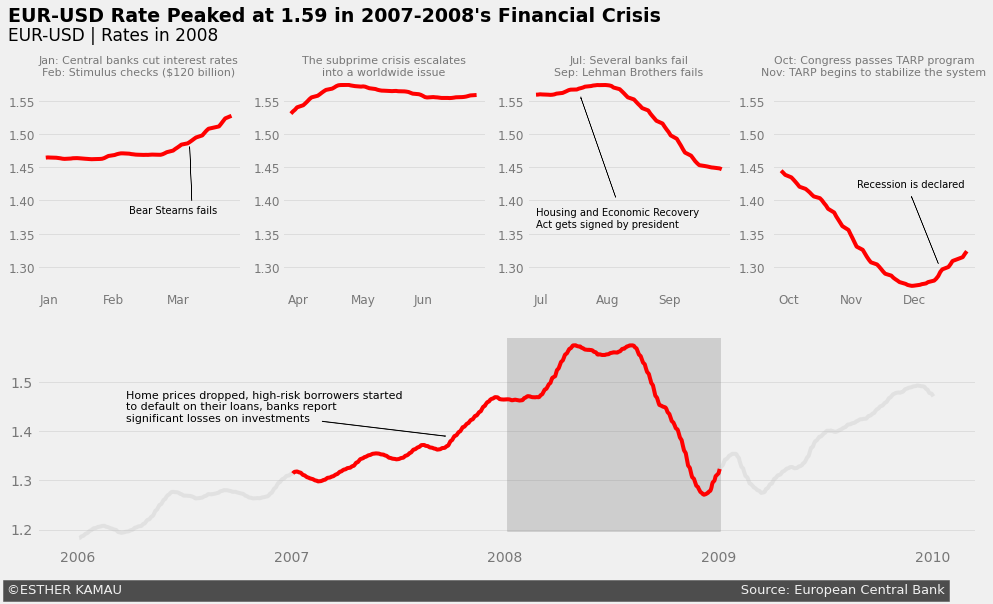

In [13]:
style.use('fivethirtyeight')

plt.figure(figsize = (15, 8))
ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)
ax5 = plt.subplot(2,1,2)

quarters = [('Jan', 'Feb', 'Mar'), ('Apr', 'May', 'Jun'), ('Jul', 'Aug', 'Sep'), ('Oct', 'Nov', 'Dec')]
exchange_rate = ['1.30', '1.35', '1.40', '1.45', '1.50', '1.55']
axes = [ax1, ax2, ax3, ax4]
titles = ['Jan: Central banks cut interest rates\nFeb: Stimulus checks ($120 billion)',
          'The subprime crisis escalates\ninto a worldwide issue',
          'Jul: Several banks fail\nSep: Lehman Brothers fails',
          'Oct: Congress passes TARP program\nNov: TARP begins to stabilize the system']

x, y = 13877, 1.292
xpos_zoom = 13862

for ax, df, months, title in zip(axes, [crisis_q1, crisis_q2, crisis_q3, crisis_q4], quarters, titles):
    ax.plot(df['Time'], df['rolling_mean'], color = 'red')
    ax.set_ylim(1.26, 1.58)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title, size = 11, alpha = 0.5)
    
    for month in months:
        ax.text(x, 1.245, month, alpha = 0.5, size = 12)
        x += 30.5
    for rate in exchange_rate:
        ax.text(xpos_zoom, y, rate, alpha = 0.5, size = 12)
        y += 0.05
    
    ax.yaxis.grid(True, alpha = 0.5)
    ax.xaxis.grid(False)
    
    y = 1.292
    xpos_zoom += 90

ax1.text(13862, 1.67, 'EUR-USD Rate Peaked at 1.59 in 2007-2008\'s Financial Crisis', weight = 'bold', size = 19)
ax1.text(13862, 1.642, 'EUR-USD | Rates in 2008', size = 17)
ax1.arrow(13950, 1.4, -1, 0.08, color = 'black')
ax1.annotate('Bear Stearns fails',
             xy = (13920, 1.38), size = 10)

ax3.arrow(14100, 1.405, -17, 0.15, color = 'black')
ax3.annotate('Housing and Economic Recovery\nAct gets signed by president',
             xy = (14061, 1.36), size = 10)

ax4.arrow(14230, 1.305, -13, 0.1, color = 'black')
ax4.annotate('Recession is declared', xy = (14190, 1.42), size = 10)

ax5.plot(crisis_usa['Time'], crisis_usa['rolling_mean'], color = 'silver', alpha = 0.3)
ax5.plot(crisis_07_08['Time'], crisis_07_08['rolling_mean'], color = 'red')
ax5.set_xticklabels([])
ax5.set_yticklabels([])
ax5.axvspan(xmin = 13880, xmax = 14245, ymin = 0.08, alpha = 0.3, color = 'grey')
ax5.arrow(13565, 1.42, 210, -0.03, color = 'black')
ax5.annotate('Home prices dropped, high-risk borrowers started\nto default on their loans, banks report\nsignificant losses on investments',
             xy = (13230, 1.42), size = 11)

ax5.text(13027, 1.07, '©ESTHER KAMAU' + ' ' * 150 + 'Source: European Central Bank',
         color = '#f0f0f0', backgroundcolor = '#4d4d4d', size = 13)

x = 13117
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax5.text(x, 1.135, year, alpha = 0.5, size = 14)
    x += 365

y = 1.19
for year in ['1.2', '1.3', '1.4', '1.5']:
    ax5.text(13033, y, year, alpha = 0.5, size = 14)
    y += 0.1

ax5.yaxis.grid(True, alpha = 0.5)
ax5.xaxis.grid(False)

plt.show()



**Insights**

We can highlight three important moments of the financial crisis, which are very noticeable in the EUR-USD exchange rate.

* At the end of 2007, when the U.S. economy was under pressure, the EUR-USD exchange rate began to rise until reaching a plateau (December 2007); which would remain until almost the end of February 2008.
* Subsequently, during the month of March, the exchange rate continued to increase until it reached its maximum peak (1.59) in April, by which time it became clear that the crisis had already become a global problem.
* Since then, there were slight variations until the month of August, when we observed that the exchange rate began to decline until reaching the lowest value of the year in December. This is probably due to the actions taken by the government, which was already implementing strategies to face the crisis. However, in that month, the recession was officially declared.


<a id="5"></a>
# Conclusion
The analysis of the EUR-USD exchange rate spanning the years 2001 to 2023 offers valuable insights into the dynamics of this critical currency pair over two distinct periods: the presidencies of the past four U.S. presidents and the tumultuous 2007-2008 financial crisis.

* When examining the exchange rate's performance during the reign of the past four presidents—George W. Bush, Barack Obama, Donald Trump, and Joe Biden—it becomes evident that currency markets are influenced by a multitude of factors, including economic policies, geopolitical events, and global economic conditions. The exchange rate exhibited notable fluctuations throughout this period, reflecting the evolving economic and political landscapes.
* The examination of the 2007-2008 financial crisis period highlights how profound financial events can have a direct impact on exchange rates. During this crisis, the EUR-USD exchange rate experienced significant shifts in response to a series of critical events, including the subprime mortgage crisis, the bankruptcy of Lehman Brothers, and government interventions to stabilize the financial system. These fluctuations underscore the interplay between financial markets and broader economic developments.

In both analyses, it is crucial to recognize the complex and interconnected nature of currency markets. Exchange rates are influenced not only by political leadership but also by monetary policy decisions, global economic conditions, market sentiment, and unforeseen events. Understanding the historical context and the multifaceted factors at play is essential for interpreting exchange rate movements accurately.